In [15]:
import geopandas as gpd
import pandas as pd

# Caminho do shapefile
caminho = "data/PRODES_AMZ_Municipal_2023.shp"

# Ler o shapefile
gdf = gpd.read_file(caminho)

print("Colunas encontradas no shapefile:")
print(gdf.columns)


# Agrupar por estado e ano, somando área total desmatada
# Salvar como CSV

gdf.to_csv('data/desmatamento_por_estado.csv', index=False)

print("✅ Arquivo CSV agregado salvo com sucesso em data/desmatamento_por_estado.csv")



C:\Users\Cliente\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pyogrio\raw.py:198: RuntimeWarning: data/PRODES_AMZ_Municipal_2023.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


Colunas encontradas no shapefile:
Index(['fid', 'state', 'path_row', 'main_class', 'class_name', 'sub_class',
       'def_cloud', 'julian_day', 'image_date', 'year', 'area_km', 'scene_id',
       'source', 'satellite', 'sensor', 'uuid', 'geometry'],
      dtype='object')
✅ Arquivo CSV agregado salvo com sucesso em data/desmatamento_por_estado.csv


In [8]:
import pandas as pd

url = "https://apisidra.ibge.gov.br/values/t/5938/n6/all/v/37/p/2021"
df = pd.read_json(url)
df.to_csv("data/pib_municipal_2021.csv", index=False)

url = "https://apisidra.ibge.gov.br/values/t/5938/n6/all/v/37/p/2020"
df = pd.read_json(url)
df.to_csv("data/pib_municipal_2020.csv", index=False)

url = "https://apisidra.ibge.gov.br/values/t/5938/n6/all/v/37/p/2019"
df = pd.read_json(url)
df.to_csv("data/pib_municipal_2019.csv", index=False)

url = "https://apisidra.ibge.gov.br/values/t/5938/n6/all/v/37/p/2018"
df = pd.read_json(url)
df.to_csv("data/pib_municipal_2018.csv", index=False)

url = "https://apisidra.ibge.gov.br/values/t/5938/n6/all/v/37/p/2017"
df = pd.read_json(url)
df.to_csv("data/pib_municipal_2017.csv", index=False)

print("✅ PIB municipal salvo com sucesso!")


✅ PIB municipal salvo com sucesso!


In [4]:
import pandas as pd
import os

# Caminho da base original
caminho = "data/desmatamento_por_estado.csv"

# Criar pasta de saída
os.makedirs("data/limpos", exist_ok=True)

# 1️⃣ Ler a base
df = pd.read_csv(caminho)
print("✅ Base carregada com sucesso!")
print("📊 Linhas:", len(df))

# 2️⃣ Manter apenas colunas importantes
colunas_importantes = [
    "fid",
    "state",
    "year",
    "area_km"
]
df = df[colunas_importantes]
print("🔹 Colunas mantidas:", list(df.columns))

df = df.rename(columns={
    "state": "UF",
    "year": "ano"
})
# 3️⃣ Corrigir tipos de dados
df["area_km"] = pd.to_numeric(df["area_km"], errors="coerce")

# 4️⃣ Filtrar apenas registros de 2021 entre 2017 
df = df.loc[(df["ano"] >= 2017)&(df["ano"] <= 2021)]

# 5️⃣ Remover linhas com dados inválidos
df = df.dropna(subset=["area_km", "ano"])
# 6️⃣ Agregar total de área desmatada por estado
df_estado = df.groupby(["UF","ano"], as_index=False)["area_km"].sum()

# 7️⃣ Salvar versão agregada
output = "data/limpos/desmatamento_2021_por_estado.csv"
df_estado.to_csv(output, index=False, encoding="utf-8-sig")

print("✅ Base agregada por estado salva com sucesso!")
print(df_estado)


✅ Base carregada com sucesso!
📊 Linhas: 801333
🔹 Colunas mantidas: ['fid', 'state', 'year', 'area_km']
✅ Base agregada por estado salva com sucesso!
    UF     ano      area_km
0   AC  2017.0   245.887601
1   AC  2018.0   426.719253
2   AC  2019.0   706.939086
3   AC  2020.0   660.819116
4   AC  2021.0   892.610973
5   AM  2017.0  1009.959775
6   AM  2018.0  1051.243234
7   AM  2019.0  1556.891468
8   AM  2020.0  1420.408867
9   AM  2021.0  2167.098538
10  AP  2017.0    17.268302
11  AP  2018.0    24.566869
12  AP  2019.0    39.061575
13  AP  2020.0    10.344820
14  AP  2021.0    16.089385
15  MA  2017.0   272.984845
16  MA  2018.0   183.252542
17  MA  2019.0   272.679759
18  MA  2020.0   315.697916
19  MA  2021.0   318.482521
20  MT  2017.0  1453.802930
21  MT  2018.0  1435.851354
22  MT  2019.0  1881.643872
23  MT  2020.0  1819.060056
24  MT  2021.0  1972.018769
25  PA  2017.0  2572.924402
26  PA  2018.0  2609.132631
27  PA  2019.0  4465.887178
28  PA  2020.0  4619.276410
29  PA  202

In [20]:
import pandas as pd
import re
import os

# Caminho do arquivo original
caminho = "data/pib_municipal_2021.csv"

# Criar pasta de saída
os.makedirs("data/limpos", exist_ok=True)

# 1️⃣ Ler a base de PIB municipal
df = pd.read_csv(caminho, encoding="utf-8")
print("✅ Base carregada com sucesso!")
print("📊 Linhas:", len(df))

# 2️⃣ Renomear colunas relevantes
df = df.rename(columns={
    "V": "pib_mil_reais",
    "D1N": "municipio",
    "D3N": "ano"
})

# 3️⃣ Extrair a sigla do estado a partir do nome do município
df["UF"] = df["municipio"].apply(
    lambda x: re.search(r"-\s*([A-Z]{2})$", x).group(1)
    if isinstance(x, str) and re.search(r"-\s*([A-Z]{2})$", x)
    else None
)

# 4️⃣ Converter valores para numérico
df["pib_mil_reais"] = pd.to_numeric(df["pib_mil_reais"], errors="coerce")

# 5️⃣ Filtrar apenas estados da Amazônia Legal
amazonia_legal = ["AC", "AM", "AP", "MA", "MT", "PA", "RO", "RR", "TO"]
df = df[df["UF"].isin(amazonia_legal)]

print("🌳 Estados filtrados (Amazônia Legal):", sorted(df["UF"].unique()))

# 6️⃣ Agrupar por estado e somar PIB
pib_estadual = df.groupby(["UF","ano"], as_index=False)["pib_mil_reais"].sum()

# 7️⃣ Adicionar PIB em bilhões para facilitar leitura
pib_estadual["pib_bilhoes"] = (pib_estadual["pib_mil_reais"] / 1_000_000).round(2)

# 8️⃣ Salvar resultado
output = "data/limpos/pib_estadual_amazonia_2021.csv"
pib_estadual.to_csv(output, index=False, encoding="utf-8-sig")

print("✅ PIB estadual da Amazônia Legal salvo com sucesso!")
print(pib_estadual)


✅ Base carregada com sucesso!
📊 Linhas: 5571
🌳 Estados filtrados (Amazônia Legal): ['AC', 'AM', 'AP', 'MA', 'MT', 'PA', 'RO', 'RR', 'TO']
✅ PIB estadual da Amazônia Legal salvo com sucesso!
   UF   ano  pib_mil_reais  pib_bilhoes
0  AC  2021     21374442.0        21.37
1  AM  2021    131531039.0       131.53
2  AP  2021     20099850.0        20.10
3  MA  2021    124980727.0       124.98
4  MT  2021    233390206.0       233.39
5  PA  2021    262904976.0       262.90
6  RO  2021     58170098.0        58.17
7  RR  2021     18202580.0        18.20
8  TO  2021     51780763.0        51.78


In [11]:
import pandas as pd
import os

# Caminho da base original
caminho = "data/br_ibge_populacao_municipio.csv"

# Criar pasta de saída
os.makedirs("data/limpos", exist_ok=True)

# 1️⃣ Ler a base
df = pd.read_csv(caminho)
print("✅ Base carregada com sucesso!")
print("📊 Linhas:", len(df))

# 2️⃣ Manter apenas colunas importantes
colunas_importantes = [
    "ano",
    "sigla_uf",
    "populacao"
]
df = df[colunas_importantes]
print("🔹 Colunas mantidas:", list(df.columns))

df = df.rename(columns={
    "sigla_uf": "UF"
})
# 3️⃣ Corrigir tipos de dados
df["ano"] = pd.to_numeric(df["ano"], errors="coerce")
df["populacao"] = pd.to_numeric(df["populacao"], errors="coerce")

# 4️⃣ Filtrar apenas registros de 2021 (sem criar coluna year permanente)
df = df.loc[(df["ano"] >= 2017) & (df["ano"] <= 2021)]

# 5️⃣ Remover linhas com dados inválidos
df = df.dropna(subset=["populacao"])

amazonia_legal = ["AC", "AM", "AP", "MA", "MT", "PA", "RO", "RR", "TO"]
df= df[df["UF"].isin(amazonia_legal)]
# 6️⃣ Agregar total de área desmatada por estado
df_estado = df.groupby(["UF","ano"], as_index=False)["populacao"].sum()


# 7️⃣ Salvar versão agregada
output = "data/limpos/br_ibge_populacao_estados_limpo.csv"
df_estado.to_csv(output, index=False, encoding="utf-8-sig")

print("✅ Base agregada por estado salva com sucesso!")
print(df_estado)


✅ Base carregada com sucesso!
📊 Linhas: 174388
🔹 Colunas mantidas: ['ano', 'sigla_uf', 'populacao']
✅ Base agregada por estado salva com sucesso!
    UF   ano  populacao
0   AC  2017   829619.0
1   AC  2018   869265.0
2   AC  2019   881935.0
3   AC  2020   894470.0
4   AC  2021   906876.0
5   AM  2017  4063614.0
6   AM  2018  4080611.0
7   AM  2019  4144597.0
8   AM  2020  4207714.0
9   AM  2021  4269995.0
10  AP  2017   797722.0
11  AP  2018   829494.0
12  AP  2019   845731.0
13  AP  2020   861773.0
14  AP  2021   877613.0
15  MA  2017  7000229.0
16  MA  2018  7035055.0
17  MA  2019  7075181.0
18  MA  2020  7114598.0
19  MA  2021  7153262.0
20  MT  2017  3344544.0
21  MT  2018  3441998.0
22  MT  2019  3484466.0
23  MT  2020  3526220.0
24  MT  2021  3567234.0
25  PA  2017  8366628.0
26  PA  2018  8513497.0
27  PA  2019  8602865.0
28  PA  2020  8690745.0
29  PA  2021  8777124.0
30  RO  2017  1805788.0
31  RO  2018  1757589.0
32  RO  2019  1777225.0
33  RO  2020  1796460.0
34  RO  2021  

In [27]:
import pandas as pd
import os

# Caminho da base original
caminho = "data/base/ipeadata[24-10-2025-01-26].csv"

# Criar pasta de saída
os.makedirs("data/limpos", exist_ok=True)

# 1️⃣ Ler a base
df = pd.read_csv(caminho, skiprows=1)
print("✅ Base carregada com sucesso!")
print("📊 Linhas:", len(df))

# 2️⃣ Manter apenas colunas importantes
colunas_importantes = ["Sigla", "2017", "2018", "2019", "2020", "2021"]
df = df[colunas_importantes]
print("🔹 Colunas mantidas:", list(df.columns))

# Renomear colunas
df = df.rename(columns={"Sigla": "UF"})

# 3️⃣ Converter anos para numérico
for ano in ["2017", "2018", "2019", "2020", "2021"]:
    df[ano] = pd.to_numeric(df[ano], errors="coerce")

# 4️⃣ Filtrar apenas Amazônia Legal
amazonia_legal = ["AC", "AM", "AP", "MA", "MT", "PA", "RO", "RR", "TO"]
df = df[df["UF"].isin(amazonia_legal)]

# 5️⃣ “Derreter” (transformar colunas em linhas)
df_melt = df.melt(
    id_vars=["UF"],                # o que permanece fixo
    value_vars=["2017", "2018", "2019", "2020", "2021"],  # o que vira linhas
    var_name="ano",                # nome da nova coluna
    value_name="IDH"               # nome dos valores
)

# 6️⃣ Converter ano pra inteiro
df_melt["ano"] = df_melt["ano"].astype(int)

# 7️⃣ Salvar resultado final
output = "data/limpos/ipeadata.csv"
df_melt.to_csv(output, index=False, encoding="utf-8-sig")

print("✅ Base transformada e salva com sucesso!")
print(df_melt.head(10))


✅ Base carregada com sucesso!
📊 Linhas: 27
🔹 Colunas mantidas: ['Sigla', '2017', '2018', '2019', '2020', '2021']
✅ Base transformada e salva com sucesso!
   UF   ano    IDH
0  AC  2017  0.712
1  AM  2017  0.728
2  AP  2017  0.732
3  MA  2017  0.685
4  MT  2017  0.770
5  PA  2017  0.694
6  RO  2017  0.721
7  RR  2017  0.746
8  TO  2017  0.740
9  AC  2018  0.733


In [7]:

import pandas as pd

# Carregar todas as bases limpas
pop = pd.read_csv("data/limpos/populacao_estadual_2017-2021.csv")
desm = pd.read_csv("data/limpos/desmatamento_2017-2021.csv")
idh = pd.read_csv("data/limpos/ipeadata.csv")
pib = pd.read_csv("data/limpos/pib_estadual_amazonia_2017_2021.csv")

# Merge progressivo por 'UF'
df_final = pop.merge(desm, on=["UF","ano"]) \
              .merge(idh, on=["UF","ano"]) \
              .merge(pib, on=["UF","ano"])

df_final = df_final.rename(columns={"area_km" : "area_desmatada"})
print("✅ Base final criada com sucesso!")

print(df_final.head())


# Salvar para uso no Scikit-Learn
df_final.to_csv("data/limpos/base_final.csv", index=False, encoding="utf-8-sig")


✅ Base final criada com sucesso!
   UF   ano  populacao  area_desmatada    IDH  pib_mil_reais  pib_bilhoes
0  AC  2017   829619.0      245.887601  0.712     14272939.0        14.27
1  AC  2018   869265.0      426.719253  0.733     15331124.0        15.33
2  AC  2019   881935.0      706.939086  0.739     15630018.0        15.63
3  AC  2020   894470.0      660.819116  0.746     16476370.0        16.48
4  AC  2021   906876.0      892.610973  0.710     21374442.0        21.37


In [8]:
import pandas as pd
import glob
import os

# Caminho da pasta onde estão os CSVs
pasta = "data/limpos/"  # ajuste se necessário

# 1️⃣ Listar todos os arquivos CSV da pasta
arquivos = glob.glob(os.path.join(pasta, "pib_estadual_amazonia_*.csv"))

# 2️⃣ Ler e juntar todos em um DataFrame
lista_dfs = []
for arquivo in arquivos:
    ano = os.path.basename(arquivo).split("_")[-1].split(".")[0]  # extrai o ano do nome do arquivo
    df = pd.read_csv(arquivo)
    df["ano"] = int(ano)  # adiciona coluna com o ano
    lista_dfs.append(df)

# 3️⃣ Concatenar tudo em uma planilha única
df_final = pd.concat(lista_dfs, ignore_index=True)

# 4️⃣ Ordenar por ano e estado
df_final = df_final.sort_values(by=["ano", "UF"]).reset_index(drop=True)

# 5️⃣ Salvar o resultado
output = "data/pib_estadual_amazonia_2017_2021.csv"
df_final.to_csv(output, index=False, encoding="utf-8-sig")

print("✅ Planilha unificada criada com sucesso!")
print(df_final.head(10))


✅ Planilha unificada criada com sucesso!
   UF   ano  pib_mil_reais  pib_bilhoes
0  AC  2017     14272939.0        14.27
1  AM  2017     93240190.0        93.24
2  AP  2017     15481909.0        15.48
3  MA  2017     89542756.0        89.54
4  MT  2017    126845895.0       126.85
5  PA  2017    155232405.0       155.23
6  RO  2017     43516144.0        43.52
7  RR  2017     12104706.0        12.10
8  TO  2017     34108132.0        34.11
9  AC  2018     15331124.0        15.33


In [29]:
import pandas as pd

# Carregar a base final
df = pd.read_csv("data/limpos/base_final.csv")

print("📊 Dimensões:", df.shape)
print("🔹 Colunas e tipos de dados:")
print(df.dtypes)
print("\n🔍 Valores nulos por coluna:")
print(df.isnull().sum())

# Conferir se todas as colunas numéricas são válidas
if df.select_dtypes(include=["float64", "int64"]).shape[1] == len(df.columns) - 1:
    print("\n✅ Todas as variáveis numéricas estão prontas pro Scikit-Learn!")
else:
    print("\n⚠️ Ainda há colunas não numéricas (verifique se o tipo 'object' aparece acima).")


📊 Dimensões: (45, 7)
🔹 Colunas e tipos de dados:
UF                object
ano                int64
populacao        float64
area_km          float64
IDH              float64
pib_mil_reais    float64
pib_bilhoes      float64
dtype: object

🔍 Valores nulos por coluna:
UF               0
ano              0
populacao        0
area_km          0
IDH              0
pib_mil_reais    0
pib_bilhoes      0
dtype: int64

✅ Todas as variáveis numéricas estão prontas pro Scikit-Learn!


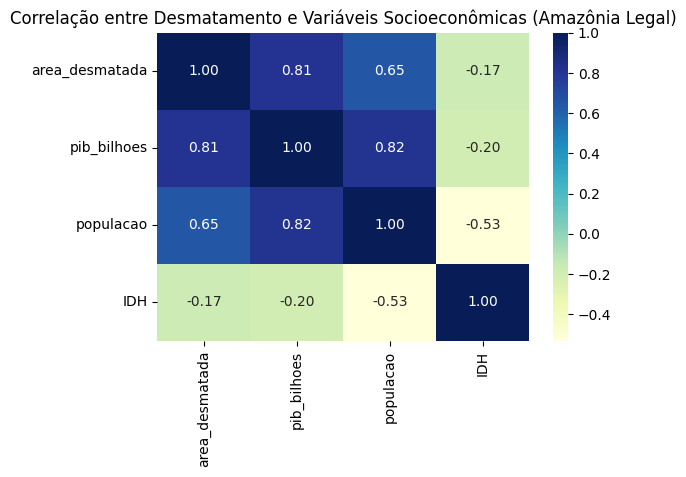

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Ler a base
df = pd.read_csv("data/limpos/base_final.csv")

# 2. Selecionar apenas as colunas numéricas relevantes
cols = ["area_desmatada", "pib_bilhoes", "populacao", "IDH"]
corr = df[cols].corr()

# 3. Gerar o mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlação entre Desmatamento e Variáveis Socioeconômicas (Amazônia Legal)")
plt.show()


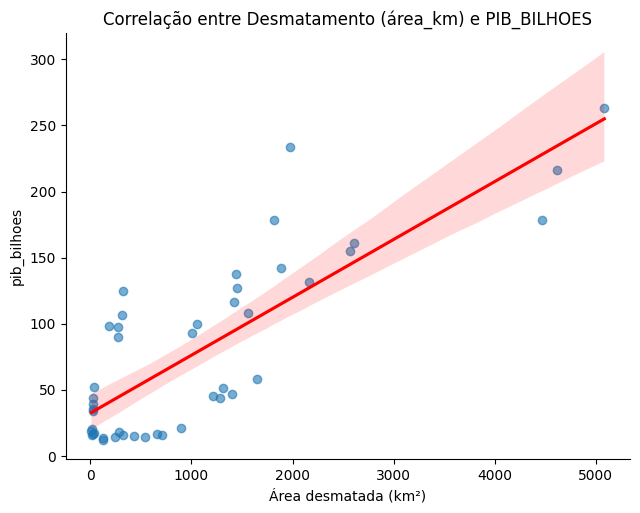

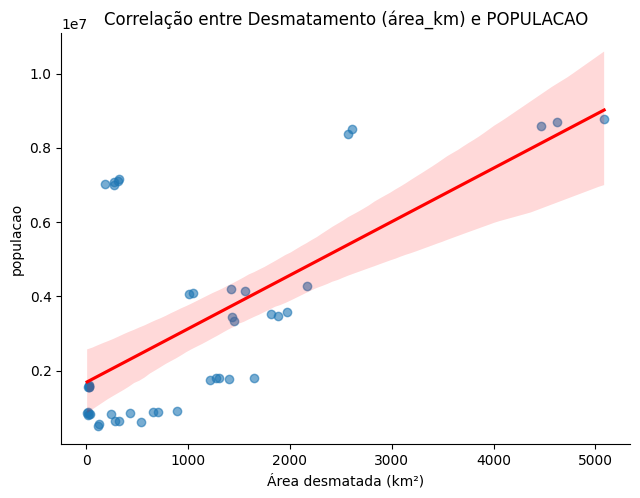

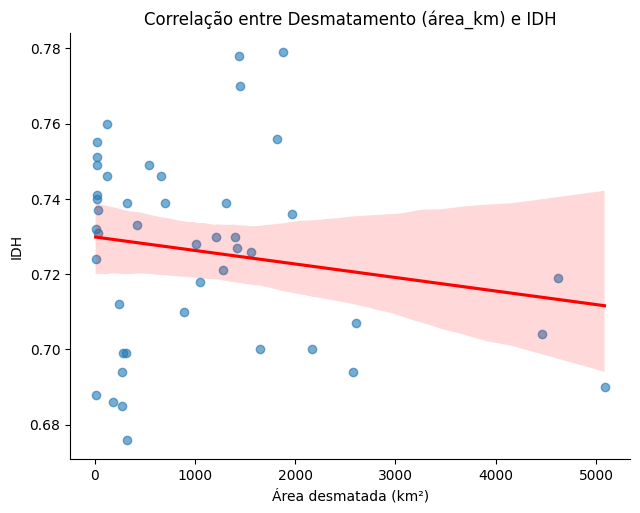

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ler a base
df = pd.read_csv("data/limpos/base_final.csv")

# Variáveis para comparar com o desmatamento
variaveis = ["pib_bilhoes", "populacao", "IDH"]

# Gerar um gráfico com reta de regressão para cada variável
for var in variaveis:
    sns.lmplot(data=df, x="area_desmatada", y=var, height=5, aspect=1.3, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    plt.title(f"Correlação entre Desmatamento (área_km) e {var.upper()}")
    plt.xlabel("Área desmatada (km²)")
    plt.ylabel(var)
    plt.show()

